In [18]:
%matplotlib inline

# Run the file

In [19]:
%run eqsimparsing.py

Will only parse out the reports as needed, no weather normalization done, this is an AMY case
Loading .\Example.SIM
Unmet Cooling Hours: 9
Unmet Heating Hours: 40
In an interactive prompt, the variables 'usage', 'sv_a_dict', 'pv_a_dict' are initialized


# Example of how to manipulate the objects

Note that the script does also output PV-A and SV-A to a csv file already

In [20]:
pv_a_dict.keys()

dict_keys(['BOILERS', 'DW-HEATERS', 'CHILLERS', 'PUMPS', 'CIRCULATION LOOPS', 'COOLING TOWERS'])

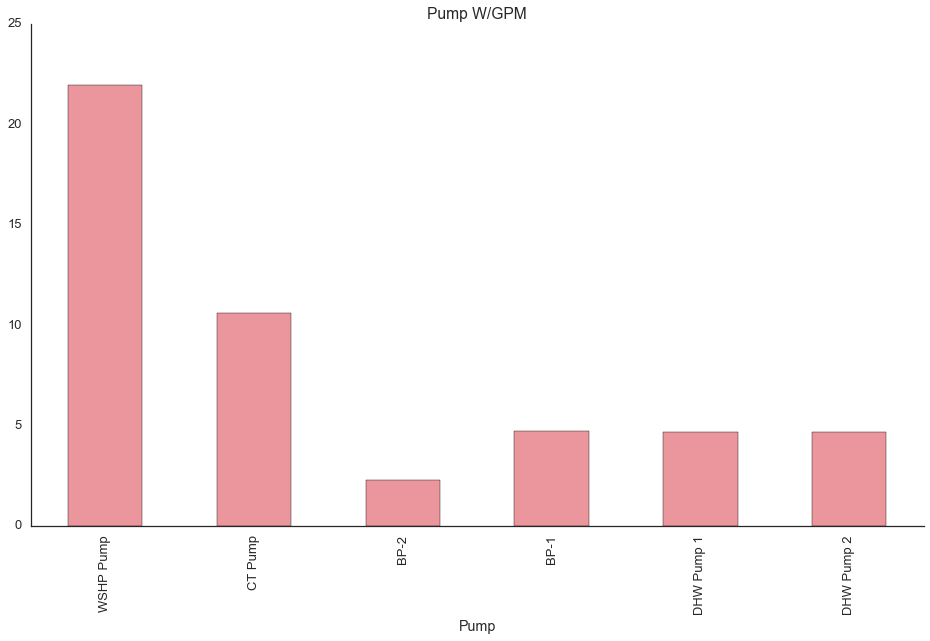

In [21]:
pv_a_dict['PUMPS'].ix[:, 'W/GPM'].plot(kind='bar', figsize=(16,9), title='Pump W/GPM', color='#EB969C',);
sns.despine()
plt.show();

In [23]:
pv_a_dict['BOILERS']

,Equipment Type,Attached to,Capacity (mmBTU/hr),Flow (GPM),EIR,HIR,Aux. (kW),Thermal Eff
Primary Equipment,,,,,,,,
Heating Boiler 1,HW-BOILER,WSHP Loop,-0.327,91.0,0,1.266,0,0.789889
Heating Boiler 2,HW-BOILER,WSHP Loop,-0.300,83.5,0,1.266,0,0.789889


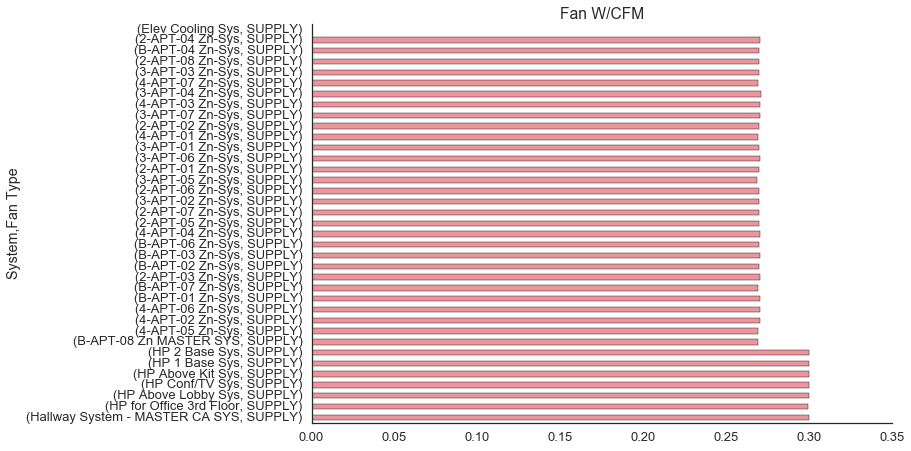

In [24]:
sv_a_dict['Fans'].ix[:,'W/CFM'].plot(kind='barh', color='#EB969C', title='Fan W/CFM')
sns.despine()
plt.show();

In [25]:
sv_a_dict.keys()

dict_keys(['Fans', 'Systems', 'Zones'])

In [26]:
sys = sv_a_dict['Systems']
sys.head()

,System Type,Altitude Factor,Floor Area (sqft),Max People,Outside Air Ratio,Cooling Capacity (kBTU/hr),Sensible (SHR),Heating Capacity (kBTU/hr),Cooling EIR (BTU/BTU),Heating EIR (BTU/BTU),Heat Pump Supplemental Heat (kBTU/hr)
System,,,,,,,,,,,
Hallway System - MASTER CA SYS,PVVT,1,2724.5,3,0,172.432,0.709,-208.729,0.269,0.24,0
HP for Office 3rd Floor,PVVT,1,327.9,2,0,17.649,0.729,-21.365,0.269,0.24,0
HP Above Lobby Sys,PVVT,1,227.3,1,0,25.441,0.71,-30.797,0.269,0.24,0
HP Conf/TV Sys,PVVT,1,1619.7,81,0,173.163,0.704,-209.614,0.269,0.24,0
HP Above Kit Sys,PVVT,1,1500.8,31,0,165.764,0.692,-200.658,0.269,0.24,0


In [27]:
# Calculating Max People/sqft
sys['Max People/sqft'] = sys['Max People'] / sys['Floor Area (sqft)']

In [30]:
# Sorting and returning top 10
sys.sort_values(by='Max People/sqft', ascending=False).head(10)

,System Type,Altitude Factor,Floor Area (sqft),Max People,Outside Air Ratio,Cooling Capacity (kBTU/hr),Sensible (SHR),Heating Capacity (kBTU/hr),Cooling EIR (BTU/BTU),Heating EIR (BTU/BTU),Heat Pump Supplemental Heat (kBTU/hr),Max People/sqft
System,,,,,,,,,,,,
HP Conf/TV Sys,PVVT,1,1619.7,81,0,173.163,0.704,-209.614,0.269,0.24,0,0.0500093
HP Above Kit Sys,PVVT,1,1500.8,31,0,165.764,0.692,-200.658,0.269,0.24,0,0.0206557
B-APT-07 Zn-Sys,PVVT,1,224.4,3,0,13.268,0.718,-16.06,0.269,0.24,0,0.013369
B-APT-08 Zn MASTER SYS,PVVT,1,233.7,3,0,12.58,0.707,-15.228,0.269,0.24,0,0.012837
2-APT-05 Zn-Sys,PVVT,1,249.9,3,0,20.339,0.715,-24.621,0.269,0.24,0,0.0120048
4-APT-05 Zn-Sys,PVVT,1,249.9,3,0,12.934,0.729,-15.656,0.269,0.24,0,0.0120048
3-APT-05 Zn-Sys,PVVT,1,249.9,3,0,13.111,0.719,-15.871,0.269,0.24,0,0.0120048
3-APT-01 Zn-Sys,PVVT,1,275.9,3,0,15.671,0.725,-18.969,0.269,0.24,0,0.0108735
B-APT-06 Zn-Sys,PVVT,1,309.7,3,0,16.23,0.712,-19.646,0.269,0.24,0,0.00968679


In [31]:
zones = sv_a_dict['Zones']
zones.head(10)

Supply Flow (CFM)  \
System                         Zone Name                           
Hallway System - MASTER CA SYS 2-HALLWAY-2 Zn                400   
                               B-HALLWAY Zn                  724   
                               1-HALLWAY-1 Zn                270   
                               1-HALLWAY-2 Zn               1185   
                               2-HALLWAY-1 Zn                995   
                               2-ELEV-ROOM Zn                 53   
                               3-HALLWAY-2 Zn                680   
                               3-HALLWAY-1 Zn                 31   
                               4-HALLWAY Zn                  770   
HP for Office 3rd Floor        3-OFFICE-Zn                   548   

                                               Exhaust Flow (CFM)  Fan (kW)  \
System                         Zone Name                                      
Hallway System - MASTER CA SYS 2-HALLWAY-2 Zn                   0         0   
                               B-HALLWAY Zn                     0         0   
                               1-HALLWAY-1 Zn                   0         0   
                               1-HALLWAY-2 Zn                   0         0   
                               2-HALLWAY-1 Zn                   0         0   
                               2-ELEV-ROOM Zn                   0         0   
                               3-HALLWAY-2 Zn                   0         0   
                               3-HALLWAY-1 Zn                   0         0   
                               4-HALLWAY Zn                     0         0   
HP for Office 3rd Floor        3-OFFICE-Zn                      0         0   

                                               Minimum Flow (Frac)  \
System                         Zone Name                             
Hallway System - MASTER CA SYS 2-HALLWAY-2 Zn                    1   
                               B-HALLWAY Zn                      1   
                               1-HALLWAY-1 Zn                    1   
                               1-HALLWAY-2 Zn                    1   
                               2-HALLWAY-1 Zn                    1   
                               2-ELEV-ROOM Zn                    1   
                               3-HALLWAY-2 Zn                    1   
                               3-HALLWAY-1 Zn                    1   
                               4-HALLWAY Zn                      1   
HP for Office 3rd Floor        3-OFFICE-Zn                       1   

                                               Outside Air Flow (CFM)  \
System                         Zone Name                                
Hallway System - MASTER CA SYS 2-HALLWAY-2 Zn                       0   
                               B-HALLWAY Zn                         0   
                               1-HALLWAY-1 Zn                       0   
                               1-HALLWAY-2 Zn                       0   
                               2-HALLWAY-1 Zn                       0   
                               2-ELEV-ROOM Zn                       0   
                               3-HALLWAY-2 Zn                       0   
                               3-HALLWAY-1 Zn                       0   
                               4-HALLWAY Zn                         0   
HP for Office 3rd Floor        3-OFFICE-Zn                          0   

                                               Cooling Capacity (kBTU/hr)  \
System                         Zone Name                                    
Hallway System - MASTER CA SYS 2-HALLWAY-2 Zn                           0   
                               B-HALLWAY Zn                             0   
                               1-HALLWAY-1 Zn                           0   
                               1-HALLWAY-2 Zn                           0   
                               2-HALLWAY-1 Zn                           0   
                        

# Group by system and apply

In [37]:
def custom_apply_zones(x):
    """ Aggregate zone data to the system level
    
    For the zones, some columns should be summed (CFM, Capacity, etc)
    But others should be averaged
    """
    # For these three columns, do a mean
    if x.name in ['Minimum Flow (Frac)', 'Sensible (FRAC)', 'W/CFM']:
        return np.mean(x)
    # For the rest, do a sum
    else:
        return np.sum(x)

In [38]:
help(custom_apply_zones)

Help on function custom_apply_zones in module __main__:

custom_apply_zones(x)
    Aggregate zone data to the system level
    
    For the zones, some columns should be summed (CFM, Capacity, etc)
    But others should be averaged



In [39]:
# After the groupby, the apply applies to each group dataframe. So I use a lambda x to apply to each column
zones_agg_metrics = zones.groupby(level='System').apply(lambda x: x.apply(custom_apply_zones))
# Recalc a weighted W/CFM
zones_agg_metrics['W/CFM'] = zones_agg_metrics['Fan (kW)'] * 1000 / zones_agg_metrics['Supply Flow (CFM)']

zones_agg_metrics.head()

,Supply Flow (CFM),Exhaust Flow (CFM),Fan (kW),Minimum Flow (Frac),Outside Air Flow (CFM),Cooling Capacity (kBTU/hr),Sensible (FRAC),Extract Rate (kBTU/hr),Heating Capacity (kBTU/hr),Addition Rate (kBTU/hr),Zone Mult,W/CFM
System,,,,,,,,,,,,
Hallway System - MASTER CA SYS,5108,0,0,1,0,0,0,126.89,0,-171.02,9,0
HP for Office 3rd Floor,548,0,0,1,0,0,0,13.61,0,-18.34,1,0
HP Above Lobby Sys,755,0,0,1,0,0,0,18.76,0,-25.29,4,0
HP Conf/TV Sys,5069,0,0,1,0,0,0,125.91,0,-169.70,2,0
HP Above Kit Sys,4708,0,0,1,0,0,0,116.94,0,-157.62,2,0


In [40]:
fans = sv_a_dict['Fans']

In [44]:
fans

,,Capacity (CFM),Diversity Factor (FRAC),Power Demand (kW),Fan deltaT (F),Static Pressure (in w.c.),Total efficiency,Mechanical Efficiency,Fan Placement,Fan Control,Max Fan Ratio (Frac),Min Fan Ratio (Frac),W/CFM
System,Fan Type,,,,,,,,,,,,
Hallway System - MASTER CA SYS,SUPPLY,5108,1,1.533,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.300117
HP for Office 3rd Floor,SUPPLY,548,1,0.164,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.299270
HP Above Lobby Sys,SUPPLY,756,1,0.227,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.300265
HP Conf/TV Sys,SUPPLY,5069,1,1.521,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.300059
HP Above Kit Sys,SUPPLY,4708,1,1.412,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.299915
HP 1 Base Sys,SUPPLY,950,1,0.285,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.300000
HP 2 Base Sys,SUPPLY,776,1,0.233,0.93,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.300258
B-APT-08 Zn MASTER SYS,SUPPLY,371,1,0.100,0.83,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.269542
4-APT-05 Zn-Sys,SUPPLY,401,1,0.108,0.83,0,0,0,DRAW-THRU,CONSTANT,1,0.3,0.269327
